C:\Users\Cristian Aguirre\AppData\Local\Temp\ipykernel_1852\42841415.py:25: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, num_simulations, calc_second_order=True)


                     ST   ST_conf
interest_rate  1.014592  0.078872
volatility     1.017801  0.086202
                     S1   S1_conf
interest_rate -0.001338  0.087071
volatility    -0.037855  0.080239
                                   S2   S2_conf
(interest_rate, volatility)  0.062037  0.122665


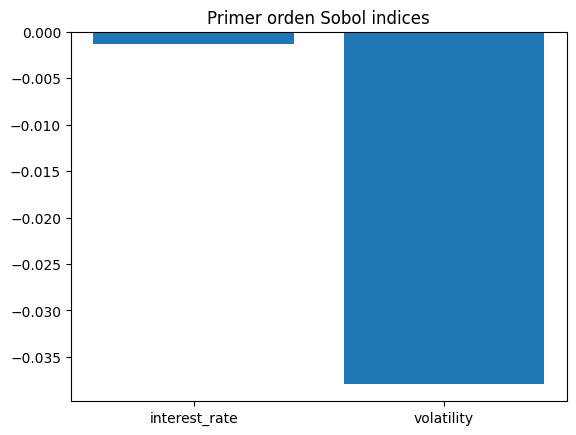

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

np.random.seed(2023)

num_simulations = 1000
investment_horizon = 5
discount_rate = 0.1

def simulate_cash_flows(interest_rate, volatility):
    cash_flows = np.random.normal(500000, 100000, size=(num_simulations, investment_horizon))
    discounted_cash_flows = cash_flows / (1 + discount_rate) ** np.arange(1, investment_horizon + 1)
    npv = np.sum(discounted_cash_flows, axis=1)
    return np.mean(npv)


problem = {
    'num_vars': 2,
    'names': ['interest_rate', 'volatility'],
    'bounds': [[0.05, 0.15], [0.1, 0.3]]
}

param_values = saltelli.sample(problem, num_simulations, calc_second_order=True)
npv_values = np.array([simulate_cash_flows(ir, v) for ir, v in param_values])
si = sobol.analyze(problem, npv_values, print_to_console=True)

plt.figure()
plt.bar(['interest_rate', 'volatility'], si['S1'])
plt.title('Primer orden Sobol indices')
plt.show()
